<a href="https://colab.research.google.com/github/xsuryanshx/webinar-analytics-prediction/blob/main/webinar_analytics_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
import tensorflow as tf
import numpy as np 
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import words
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
!pip install PyPDF2
!pip install textract --upgrade
!pip install wordninja
!pip install SpeechRecognition
!pip install pydub
import wordninja
import PyPDF2
import textract

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Requirement already up-to-date: textract in /usr/local/lib/python3.6/dist-packages (1.6.3)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Use for speech input


# importing libraries 
import speech_recognition as sr 
import os 
from pydub import AudioSegment 
from pydub.silence import split_on_silence 

# a function that splits the audio file into chunks 
# and applies speech recognition 
def silence_based_conversion(path = "alice-medium.wav"): 

	# open the audio file stored in 
	# the local system as a wav file. 
	song = AudioSegment.from_wav(path) 

	# open a file where we will concatenate 
	# and store the recognized text 
	fh = open("recognized.txt", "w+") 
		
	# split track where silence is 0.5 seconds 
	# or more and get chunks 
	chunks = split_on_silence(song, 
		# must be silent for at least 0.5 seconds 
		# or 500 ms. adjust this value based on user 
		# requirement. if the speaker stays silent for 
		# longer, increase this value. else, decrease it. 
		min_silence_len = 500, 

		# consider it silent if quieter than -16 dBFS 
		# adjust this per requirement 
		silence_thresh = -26
	) 

	# create a directory to store the audio chunks. 
	try: 
		os.mkdir('audio_chunks') 
	except(FileExistsError): 
		pass

	# move into the directory to 
	# store the audio files. 
	os.chdir('audio_chunks') 

	i = 0
	# process each chunk 
	for chunk in chunks: 
			
		# Create 0.5 seconds silence chunk 
		chunk_silent = AudioSegment.silent(duration = 5) 

		# add 0.5 sec silence to beginning and 
		# end of audio chunk. This is done so that 
		# it doesn't seem abruptly sliced. 
		audio_chunk = chunk_silent + chunk + chunk_silent 

		# export audio chunk and save it in 
		# the current directory. 
		print("saving chunk{0}.wav".format(i)) 
		# specify the bitrate to be 192 k 
		audio_chunk.export("./chunk{0}.wav".format(i), bitrate ='128k', format ="wav") 

		# the name of the newly created chunk 
		filename = 'chunk'+str(i)+'.wav'

		print("Processing chunk "+str(i)) 

		# get the name of the newly created chunk 
		# in the AUDIO_FILE variable for later use. 
		file = filename 

		# create a speech recognition object 
		r = sr.Recognizer() 

		# recognize the chunk 
		with sr.AudioFile(file) as source: 
			# remove this if it is not working 
			# correctly. 
			#r.adjust_for_ambient_noise(source) 
			audio_listened = r.listen(source) 

		try: 
			# try converting it to text 
			rec = r.recognize_google(audio_listened) 
			# write the output to the file.

			fh.write(rec+" ") 
			print(rec)
		# catch any errors. 
		except sr.UnknownValueError: 
			print("Could not understand audio") 

		except sr.RequestError as e: 
			print("Could not request results. check your internet connection") 

		i += 1

	os.chdir('..') 

audio_path = "/content/drive/My Drive/abhinav's shared/AudioCutter_45minaudio.wav"

silence_based_conversion(audio_path) 


In [ ]:
with open('/content/recognized.txt', 'r') as f2:
    text = f2.read()
text

In [ ]:
# Use for text file input

fileurl = "/content/drive/My Drive/abhinav's shared/Colab Notebooks/resources/magazines/The Psychology of Selling ( PDFDrive ).pdf"
pdfFileObj = open(fileurl,'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
num_pages = pdfReader.numPages
count = 0
text = ""

while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()
if text != "":
   text = text
else:
   text = textract.process(fileurl, method='tesseract', language='eng')
data = text

In [ ]:
tokenizer = Tokenizer()
data = text
data = data.replace('\n',' ')
data = data.replace('  ',' ')
data = data.lower()
for x in data:
    data = data.replace(x, re.sub('[^a-zA-Z .]','',x))
data = data.split(' ')

#------activate this cell to remove the list of non vocabulary words (according to wordnet)------
#nonvocab = []
#for i in range(len(data)):
#  if not wordnet.synsets(data[i]):
#    nonvocab.append(data[i])
#for i in nonvocab:
#    data.remove(i)

data = [word for word in data if len(word)>0]
newdata = []
for i in data:
  if i[-1] != '.':
    for i in wordninja.split(i):
      newdata.append(i)
for i in range(len(newdata)):
  newdata[i] = lemmatizer.lemmatize(newdata[i])  
newdata = [word for word in newdata if len(word)>0]
corpus = []
max_len = 70
#max_len = 15
for i in range(0,len(newdata)//max_len):
  corpus.append(' '.join(newdata[max_len*(i-1):max_len*(i)]))
data = ' '.join(newdata)

tokenizer.fit_on_texts(corpus)

total_words = int(len(tokenizer.word_index))+1
print(total_words)

1222


In [ ]:
corpus

['',
 'the psychology of selling the art of closing sale brian tracy the psychology of selling the art of closing sale brian tracy mc ml xxxvii content show you can benefit most from this program the psychology of selling developing a powerful sale personality why people buy creative selling approaching the prospect the sale process the psychology of closing when objection get in the way winning closing technique i winning closing',
 'technique ii managing your time efficiently ten key to success in selling how you can benefit most from this program the final value to you of the psychology of selling will depend on how many of it insight and guideline you can or choose to adopt a routine way of thinking and you ll be wise to listen to each audio session several dont expect to get full value from',
 'these session if you hear them only even the most intelligent thoughtful listener need to hear session such a these several time to be able to pick up think over and internalize all the ide

In [ ]:
input_sequence = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_grams = token_list[:i]
        input_sequence.append(n_grams)
        
print(len(input_sequence))
max_len = max([len(x) for x in input_sequence])
print(max_len)

input_sequence = pad_sequences(input_sequence, maxlen=max_len, padding="pre", truncating="pre")

7245
69


In [ ]:
input_sequence[29]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1,  62,   5,  16,   1, 426,   5,  56,  19, 427, 428,   1,  62,
         5,  16,   1, 426,   5,  56,  19, 427, 428, 646, 647, 648, 649,
       192,   4,  31,  67], dtype=int32)

In [ ]:
xs, labels = input_sequence[:,:-1] , input_sequence[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = 'model_checkpoints/checkpoint'
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                              frequency='epoch',
                              save_weights_only=True,
                              verbose=1)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 250, input_length=max_len-1,))
model.add(tf.keras.layers.Bidirectional(LSTM(150,return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(LSTM(100,return_sequences=False)))
model.add(Dense(units=50))
model.add(Dense(units=50))
model.add(Dense(total_words, activation='softmax'))
#adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(xs, ys, batch_size=100, epochs=100, verbose=1,callbacks = [checkpoint])
model.save('model.h5')
print(model)

Epoch 1/100
73/73 [==============================] - ETA: 0s - loss: 6.1650 - accuracy: 0.0486
Epoch 00001: saving model to model_checkpoints/checkpoint
73/73 [==============================] - 3s 36ms/step - loss: 6.1650 - accuracy: 0.0486
Epoch 2/100
73/73 [==============================] - ETA: 0s - loss: 5.7791 - accuracy: 0.0589
Epoch 00002: saving model to model_checkpoints/checkpoint
73/73 [==============================] - 3s 36ms/step - loss: 5.7791 - accuracy: 0.0589
Epoch 3/100
73/73 [==============================] - ETA: 0s - loss: 5.6751 - accuracy: 0.0569
Epoch 00003: saving model to model_checkpoints/checkpoint
73/73 [==============================] - 3s 36ms/step - loss: 5.6751 - accuracy: 0.0569
Epoch 4/100
73/73 [==============================] - ETA: 0s - loss: 5.5678 - accuracy: 0.0656
Epoch 00004: saving model to model_checkpoints/checkpoint
73/73 [==============================] - 3s 36ms/step - loss: 5.5678 - accuracy: 0.0656
Epoch 5/100
73/73 [=================

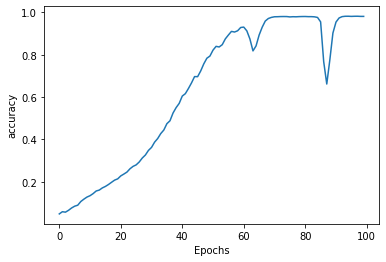

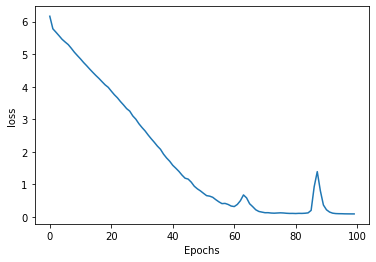

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()


plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
! ls -lh 

total 14M
drwx------ 5 root root 4.0K Oct 12 17:13 drive
drwxr-xr-x 2 root root 4.0K Oct 12 17:20 model_checkpoints
-rw-r--r-- 1 root root  14M Oct 12 17:20 model.h5
drwxr-xr-x 1 root root 4.0K Oct  5 16:31 sample_data


In [ ]:
seed_text = corpus[-1]
next_words = 100
pred_text = ""
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
	pred_text += " " + output_word
#print(seed_text)
import textwrap 
value = seed_text

wrapper = textwrap.TextWrapper(width=100) 
  
word_list = wrapper.wrap(text=value) 
  
# Print each line. 
for element in word_list: 
    print(element) 


your field and decide to be like them if you associate with people who are not success oriented that
alone can prevent your guard your by integrity we mean not only being honest with others but also
being true to yourself and your use your in born each person ha enormous reserve of creativity deep
inside him which can be used if he stir them up and practice every always conversation is that watch
from the one or the top reason why one or the most powerful salesperson is to success back after
your idea is managing your arm around that managing your visit back after a reason so ability to
nothing get talking to think about what dont you want to know keyed by well period example relaxed
at your judge of your personal development you re going to try to satisfy you are good summary the
take assumes the one who are always communicate from you think for to mail information effectively
exactly is a great it is


In [ ]:
data = pred_text
data = data.split(' ')
for i in range(len(data)):
  data[i] = lemmatizer.lemmatize(data[i])
data = [word for word in data if len(word)>0]
#data = ' '.join(data)
#corpus = data.lower().split('.')
corpus = []
max_len = 20
for i in range(0,len(data)//max_len):
  corpus.append(' '.join(data[max_len*(i-1):max_len*(i)]))
header = ['Text']
lda_data = pd.DataFrame(corpus,columns=header)

#lda_data.to_csv (r"/content/drive/My Drive/abhinav's shared/Colab Notebooks/dump/lda_data.csv", index = False, header=False)
stop = stopwords.words('english')
lda_data['Text'] = lda_data['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
lda_data

,Text
0,
1,conversation watch one top reason one powerful...
2,success back idea managing arm around managing...
3,nothing get talking think dont want know keyed...
4,judge personal development going try satisfy g...


In [ ]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
data_cv = cv.fit_transform(lda_data.Text)

In [ ]:
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

In [ ]:
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [ ]:
import pandas as pd
import pickle

data = pd.read_pickle('dtm_stop.pkl')
data.head()

,ability,arm,around,assumes,back,conversation,development,dont,example,get,going,good,idea,judge,keyed,know,managing,nothing,one,period,personal,powerful,reason,relaxed,salesperson,satisfy,success,summary,take,talking,think,top,try,visit,want,watch,well
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,1,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1
4,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0


In [ ]:
from gensim import matutils, models,corpora
from gensim.models import CoherenceModel
import scipy.sparse

In [ ]:
tdm = data.transpose()
tdm.head()-

,0,1,2,3,4
ability,0,0,1,0,0
arm,0,0,1,0,0
around,0,0,1,0,0
assumes,0,0,0,0,1
back,0,0,2,0,0


In [ ]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [ ]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())
word2id = dict((k, v) for k, v in cv.vocabulary_.items())
d = corpora.Dictionary()
d.id2token = id2word
d.token2id = word2id

In [ ]:
lda = models.LdaModel(corpus=corpus, 
                      id2word=id2word, 
                      num_topics = 4, 
                      passes=10)
lda.show_topics()

[(0,
  '0.065*"development" + 0.065*"try" + 0.065*"take" + 0.065*"personal" + 0.065*"satisfy" + 0.065*"judge" + 0.065*"assumes" + 0.065*"good" + 0.065*"going" + 0.065*"summary"'),
 (1,
  '0.027*"one" + 0.027*"top" + 0.027*"powerful" + 0.027*"conversation" + 0.027*"watch" + 0.027*"salesperson" + 0.027*"reason" + 0.027*"back" + 0.027*"ability" + 0.027*"managing"'),
 (2,
  '0.028*"managing" + 0.028*"back" + 0.027*"around" + 0.027*"success" + 0.027*"ability" + 0.027*"idea" + 0.027*"reason" + 0.027*"arm" + 0.027*"visit" + 0.027*"powerful"'),
 (3,
  '0.056*"one" + 0.056*"reason" + 0.056*"back" + 0.056*"managing" + 0.031*"salesperson" + 0.031*"watch" + 0.031*"conversation" + 0.031*"top" + 0.031*"powerful" + 0.031*"know"')]

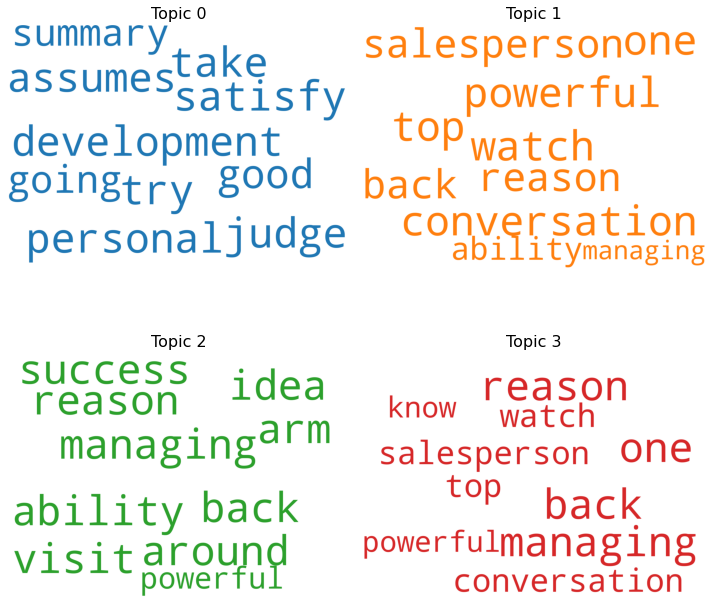

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda.show_topics(formatted=False,num_words=10)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
#coherence_model_lda = CoherenceModel(model=lda, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
#coherence_lda = coherence_model_lda.get_coherence()
#print('\nCoherence Score: ', coherence_lda)


Perplexity:  -4.510331854587648


In [ ]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  # don't skip this

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, d)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.092614  0.078452       1        1  29.234272
0      0.109002  0.025645       2        1  26.811728
1     -0.039236 -0.110316       3        1  24.390927
2      0.022848  0.006219       4        1  19.563072, topic_info=        Term      Freq     Total Category  logprob  loglift
2        one  1.000000  1.000000  Default  30.0000  30.0000
8       back  1.000000  1.000000  Default  29.0000  29.0000
10  managing  1.000000  1.000000  Default  28.0000  28.0000
4     reason  1.000000  1.000000  Default  27.0000  27.0000
3        top  0.000000  0.000000  Default  26.0000  26.0000
..       ...       ...       ...      ...      ...      ...
17   talking  0.118114  1.088168   Topic4  -4.2181  -0.5891
19      dont  0.118020  1.088189   Topic4  -4.2189  -0.5899
22     keyed  0.117961  1.088202   Topic4  -4.2194  -0.5904
10  managing  0.115824  1.608536   Topic4  -4.2377  -0.9995
8       back  0.115817  1.608537   Topic4  -4.2378  -0.9995

[171 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
14        2  0.938361       ability
11        2  0.938362           arm
12        2  0.938362        around
36        3  0.959384       assumes
8         2  0.621683          back
0         4  1.014173  conversation
29        3  0.959384   development
19        1  0.918958          dont
25        1  0.919053       example
16        1  0.919034           get
30        3  0.959384         going
33        3  0.959384          good
9         2  0.938362          idea
27        3  0.959384         judge
22        1  0.918947         keyed
21        1  0.919087          know
10        2  0.621683      managing
15        1  0.919030       nothing
2         4  0.690036           one
24        1  0.919086        period
28        3  0.959384      personal
5         4  1.014173      powerful
4         2  0.654074        reason
4         4  0.654074        reason
26        1  0.919065       relaxed
6         4  1.014174   salesperson
32        3  0.959384       satisfy
7         2  0.938361       success
34        3  0.959384       summary
35        3  0.959384          take
17        1  0.918976       talking
18        1  0.919048         think
3         4  1.014175           top
31        3  0.959384           try
13        2  0.938362         visit
20        1  0.919032          want
1         4  1.014174         watch
23        1  0.919042          well, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])